# TensorFlow 2.0

In [1]:
import os
from glob import glob
from datetime import datetime

import numpy as np

import tensorflow as tf
from tensorflow.keras import layers

from tensorflow.keras import datasets 

import matplotlib.pyplot as plt

%matplotlib inline

## Hyperparameter Tunning

In [2]:
num_epochs = 50
batch_size = 32

learning_rate = 0.001

dropout_rate = 0.5

input_shape = (32, 32, 3)
num_classes = 10

## Build Model

In [3]:
inputs = layers.Input(input_shape)

net = layers.Conv2D(32, (3, 3), padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(dropout_rate)(net)

net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(dropout_rate)(net)

net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(dropout_rate)(net)
net = layers.Dense(num_classes)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name='Basic_CNN')

In [4]:
# Model is the full model w/o custom layers
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),  # Optimization
              loss='sparse_categorical_crossentropy',  # Loss Function 
              metrics=['accuracy'])  # Metrics / Accuracy

# Data Preprocess

In [9]:
train_paths = glob('C:/Users/신상훈/Desktop/새 폴더/dataset/cifar/train/*.png')[:100]
test_paths = glob('C:/Users/신상훈/Desktop/새 폴더/dataset/cifar/test/*.png')[:100]

In [10]:
def get_class_name(path):
    return path.split('_')[-1].replace('.png', '')

In [11]:
train_labels = [get_class_name(path) for path in train_paths]
class_names = np.unique(train_labels)

In [12]:
def get_label(path):
    fname = tf.strings.split(path, '_')[-1]
    lbl_name = tf.strings.regex_replace(fname, '.png', '')
    onehot = tf.cast(lbl_name == class_names, tf.uint8)
    return tf.argmax(onehot)  # 이번에는 onehot이 아닌 label 번호로

In [13]:
def load_image_label(path):
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile)
    image = tf.cast(image, tf.float32) / 255.  # rescale
    
    label = get_label(path)
    return image, label

In [14]:
def image_preprocess(image, label):
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_flip_left_right(image)
    return image, label

In [15]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [16]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_paths)
train_dataset = train_dataset.map(load_image_label, num_parallel_calls=AUTOTUNE)
train_dataset = train_dataset.map(image_preprocess, num_parallel_calls=AUTOTUNE)
train_dataset = train_dataset.batch(batch_size)
train_dataset = train_dataset.shuffle(buffer_size=len(train_paths))
train_dataset = train_dataset.repeat()

In [17]:
test_dataset = tf.data.Dataset.from_tensor_slices(test_paths)
test_dataset = test_dataset.map(load_image_label, num_parallel_calls=AUTOTUNE)
test_dataset = test_dataset.batch(batch_size)
test_dataset = test_dataset.repeat()

## Training

In [18]:
steps_per_epoch = len(train_paths) // batch_size
validation_steps = len(test_paths) // batch_size

history = model.fit_generator(
    train_dataset,
    steps_per_epoch=steps_per_epoch,
    validation_data=test_dataset,
    validation_steps=validation_steps,
    epochs=num_epochs
)

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
3/3 [==============================] - 2s 491ms/step - loss: 2.3153 - accuracy: 0.0528 - val_loss: 2.3298 - val_accuracy: 0.0729
Epoch 2/50
3/3 [==============================] - 0s 94ms/step - loss: 2.3496 - accuracy: 0.0442 - val_loss: 2.3204 - val_accuracy: 0.0729
Epoch 3/50
3/3 [==============================] - 0s 113ms/step - loss: 2.3116 - accuracy: 0.0664 - val_loss: 2.3120 - val_accuracy: 0.0729
Epoch 4/50
3/3 [==============================] - 0s 89ms/step - loss: 2.3092 - accuracy: 0.0715 - val_loss: 2.3093 - val_accuracy: 0.1667
Epoch 5/50
3/3 [==============================] - 0s 88ms/step - loss: 2.2971 - accuracy: 0.0983 - val_loss: 2.3258 - val_accuracy: 0.1042
Epoch 6/50
3/3 [==============================] - 0s 104ms/step - loss: 2.2907 - accuracy: 0.0871 - val_loss: 2.3667 - val_accuracy: 0.0729
Epoch 7/50
3/3 [==============================] - 0s 123ms/step - loss: 2.3760 - accuracy: 0.0221 - val_loss: 2.3567 - val_accuracy: 0.0833
Epoch 8/50
3/3 [=======

# Predict

### 이미지를 Load 직접 load해서 넣는 방법

In [19]:
path = test_paths[0]
path

'C:/Users/신상훈/Desktop/새 폴더/dataset/cifar/test\\0_cat.png'

In [20]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile, dtype= tf.float32)
image.shape

TensorShape([32, 32, 3])

In [21]:
image = image[tf.newaxis,...]

In [22]:
image.shape

TensorShape([1, 32, 32, 3])

In [23]:
pred = model.predict(image)

In [24]:
pred.shape

(1, 10)

In [25]:
pred

array([[0.03560392, 0.11464757, 0.01880144, 0.10517231, 0.14810559,
        0.04463694, 0.10644897, 0.16490127, 0.16486333, 0.09681855]],
      dtype=float32)

In [26]:
np.argmax(pred)

7

### generator에서 데이터를 가져오는 방법

In [27]:
test_image, test_label = next(iter(test_dataset))

In [28]:
test_image.shape

TensorShape([32, 32, 32, 3])

In [29]:
pred = model.predict(test_image)

In [30]:
pred.shape

(32, 10)

In [31]:
pred[0]

array([0.03560393, 0.1146476 , 0.01880144, 0.1051723 , 0.14810562,
       0.04463694, 0.10644899, 0.1649013 , 0.16486335, 0.09681857],
      dtype=float32)

In [32]:
np.argmax(pred[0])

7

### genetator에 넣는 방법

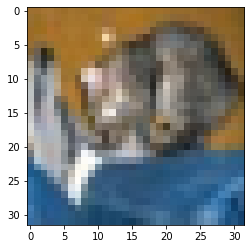

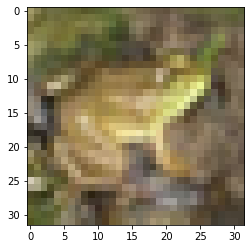

In [35]:
for image, label in test_dataset.take(2):
    plt.imshow(image[0])
    plt.show()

In [36]:
pred = model.predict_generator(test_dataset.take(2))

In [37]:
pred.shape

(64, 10)

In [39]:
image, label = next(iter(test_dataset))

In [40]:
image.shape

TensorShape([32, 32, 32, 3])

In [41]:
evals = model.evaluate(image, label)

1/1 [==============================] - 0s 27ms/step - loss: 2.5633 - accuracy: 0.2188


In [42]:
evals

[2.563284397125244, 0.21875]

# Saving Model

In [43]:
save_path = 'my_model.h5'

In [45]:
model.save(save_path,include_optimizer = True)

In [46]:
model = tf.keras.models.load_model('my_model.h5')

# Save Model -2

In [47]:
model.save_weights('model_weights.h5')

In [50]:
from tensorflow.keras.models import model_from_json

In [53]:
with open('model_architecture.json','w') as f:
    f.write(model.to_json())

In [54]:
with open('model_architecture.json','r') as f:
    model = model_from_json(f.read())

In [55]:
model.load_weights('model_weights.h5')

# H5 모델 들여다보기

In [56]:
import h5py

In [57]:
model_file = h5py.File('my_model.h5','r+')

In [58]:
model_file.keys()

<KeysViewHDF5 ['model_weights', 'optimizer_weights']>

In [59]:
model_file['model_weights'].keys()

<KeysViewHDF5 ['activation', 'activation_1', 'activation_2', 'activation_3', 'activation_4', 'activation_5', 'conv2d', 'conv2d_1', 'conv2d_2', 'conv2d_3', 'dense', 'dense_1', 'dropout', 'dropout_1', 'dropout_2', 'flatten', 'input_1', 'max_pooling2d', 'max_pooling2d_1']>

In [61]:
model_file['model_weights']['conv2d']['conv2d'].keys()

<KeysViewHDF5 ['bias:0', 'kernel:0']>

In [62]:
model_file['model_weights']['conv2d']['conv2d']['kernel:0']

<HDF5 dataset "kernel:0": shape (3, 3, 3, 32), type "<f4">

In [63]:
weight = np.array(model_file['model_weights']['conv2d']['conv2d']['kernel:0'])

In [64]:
weight

array([[[[ 3.94511707e-02, -1.12727657e-01, -3.11477389e-02,
          -7.26224994e-03,  9.02975798e-02, -2.68134438e-02,
           6.86336458e-02,  1.33804873e-01, -6.45649508e-02,
           1.17462941e-01,  5.05961552e-02,  9.35003385e-02,
           4.29112203e-02,  1.36047110e-01,  6.19918481e-03,
           1.03624955e-01, -8.51304829e-02, -4.71040495e-02,
           6.70871586e-02,  4.01722975e-02,  1.16170347e-01,
           9.70729738e-02, -1.27999663e-01,  1.15787983e-01,
          -1.11234985e-01, -2.87076961e-02, -8.40476826e-02,
           8.57480094e-02,  9.46685225e-02,  1.10041410e-01,
           8.32153708e-02, -9.01275575e-02],
         [-3.32142673e-02, -3.64122018e-02,  4.45424998e-03,
           4.56789061e-02, -1.31622717e-01,  2.55606826e-02,
          -3.47232744e-02, -4.29090708e-02, -1.77600514e-02,
          -2.01471709e-02, -5.23959696e-02, -1.18786357e-01,
           8.57889950e-02, -1.00889809e-01, -3.04975156e-02,
           5.20004965e-02,  7.27961585e-